Name: Beyza Akdeniz

ID: 201101017

Course: YAP476 /BIL573


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy==1.24.3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Task 1: Load and Explore the Data Set

## 1. Load the provided datasets as data frames

In [ ]:
path = "/home/beyza/Summer2024/Data_Mining/HW2"
ds1_path = path + '/winequality-red.csv'

In [ ]:
wine_df = pd.read_csv(ds1_path, sep=';')

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Understand the structure and basic statistics of the data set to inform further data processing and modelling.

    • Display Summary Statistics of Data

In [1]:
summary = wine_df.describe()
print("\n Wine Quality Statistics\n")
print(summary)

NameError: name 'wine_df' is not defined

    • Checking missing values


In [2]:
wine_df.isnull().sum()

NameError: name 'wine_df' is not defined

    • Analyse the distribution of target variable

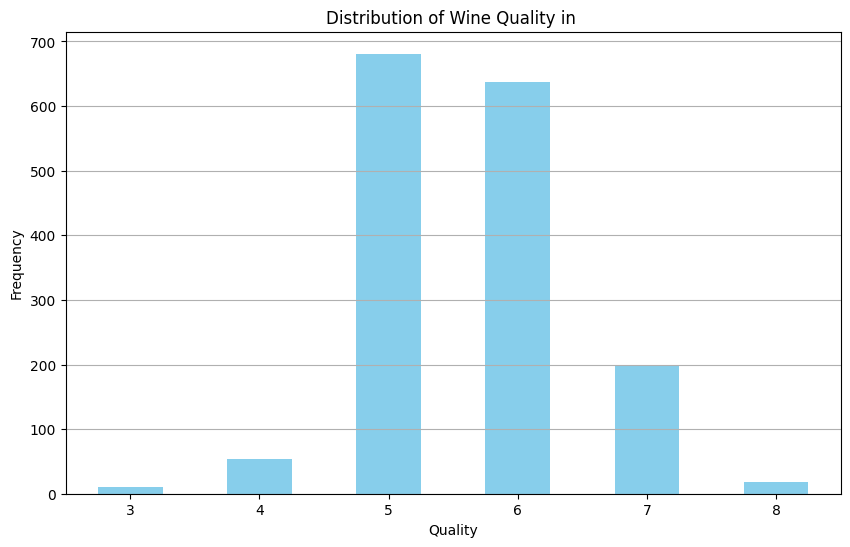

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [ ]:
quality_counts = wine_df['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality in ')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(quality_counts)

    • Visualize the Distribution of Each Feature via histogram or pair-plots

In [ ]:
# List of features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Plot histograms for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(wine_df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pair-plots for all features
sns.pairplot(wine_df[features + ['quality']], diag_kind='kde')
plt.show()

    • Compute the correlation matrix and plot the heatmap of the correlation matrix

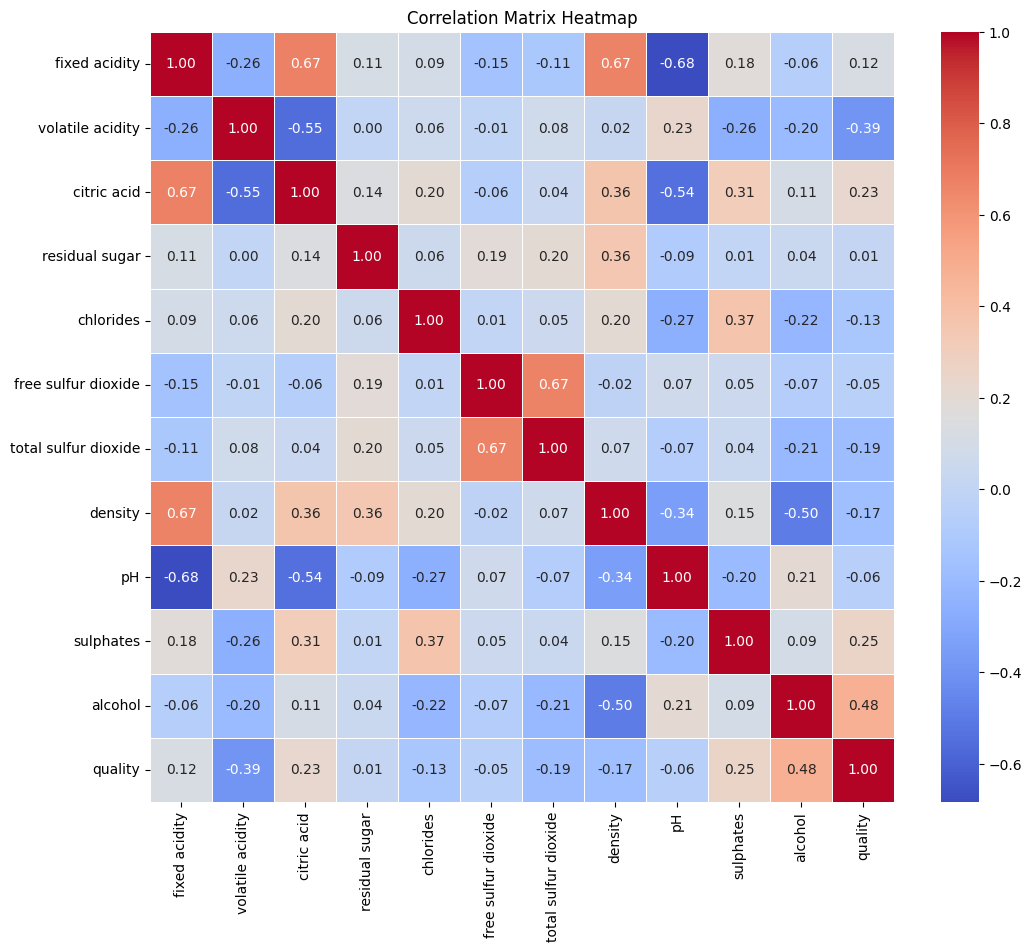

In [ ]:
# Compute the correlation matrix
correlation_matrix = wine_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## 3. Provide a detailed account of your observations.

There is no Nan or null values in the dataset.

5 and 6 quality wines are common.

High Correlation Between Some Features:
    Fixed Acidity and Citric Acid: These two features show a moderate positive correlation.
    Free Sulfur Dioxide and Total Sulfur Dioxide: These features exhibit a strong positive correlation.

Negative Correlation with Quality:
    Volatile Acidity: There is a negative correlation between volatile acidity and wine quality. Higher volatile acidity tends to be associated with lower quality wines.
    Density: This feature shows a negative correlation with quality.

Positive Correlation with Quality:
    Alcohol: There is a positive correlation between alcohol content and wine quality. Higher alcohol levels are often associated with better quality wines.
    Sulphates: This feature also shows a positive correlation with quality.

Weak Correlations:
    Many features such as pH, residual sugar, and chlorides has very weak correlations with wine quality.

# Task 2: Prepare Train, Test and Validation sets

## 1. Split the data set into training and test sets. (Test size should be %20 of the entire data set)

In [ ]:
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# Binarize the target for ROC AUC
y_bin = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training feature set shape: {X_train.shape}')
print(f'Training target set shape: {y_train.shape}')
print(f'Test feature set shape: {X_test.shape}')
print(f'Test target set shape: {y_test.shape}')

Training feature set shape: (1279, 11)
Training target set shape: (1279,)
Test feature set shape: (320, 11)
Test target set shape: (320,)


# Task 3: Hyperparameter Tuning (Grid Search) & Select the Best Models

## 1. Are the models in need of hyper-parameter tuning and if so, why or why not? Explain it

Hyper-parameter tuning is an essential process in machine learning that involves selecting the best set of hyper-parameters for a model to improve its performance. Hyper-parameters are set before the learning process begins and directly impact the behavior and performance of the model.

Different models and algorithms have various hyper-parameters that control aspects like learning rate, depth of trees, number of neighbors, etc. Properly tuning these hyper-parameters can significantly enhance the model's accuracy, precision, recall, F1-score, and other performance metrics.

Hyper-parameter tuning helps in finding a balance between overfitting and underfitting.

Some hyper-parameters impact the computational efficiency of the training process. For example, in gradient boosting, the number of estimators and the learning rate need to be tuned to ensure that the model converges in a reasonable amount of time without compromising performance.

## 2. Apply Hyperparameter Tuning on models that you decide to see which parameters define the best classifier using cross-validation to ensure robust performance.

• Define the Hyperparameter Grid: Specify the hyperparameters and their
possible values that you want to search over.

In [ ]:
# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for Naive Bayes (GaussianNB does not have hyperparameters to tune)
param_grid_nb = {}

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear']
}

• Perform Cross-Validation: Use cross-validation to evaluate the model's
performance for each combination of hyperparameters.

• Select the Best Hyperparameters: Choose the hyperparameters that result in
the best cross-validation performance.

Note: You can apply 5-Fold Cross-Validation (cv=5),
Using cross-validation ensures that the model's performance is not dependent on a
particular train-validation split and provides a better estimate of its generalization
ability.

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Naive Bayes
nb = GaussianNB()
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=2)
grid_search_nb.fit(X_train, y_train)
best_params_nb = grid_search_nb.best_params_ if param_grid_nb else {}
best_score_nb = grid_search_nb.best_score_

# SVM
svm = SVC()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


• Train the Final Model: Train the model using the best hyperparameters on the
combined training and validation set.


In [ ]:
# Train final Decision Tree model
final_dt = DecisionTreeClassifier(**best_params_dt)
final_dt.fit(X_train, y_train)

# Train final Naive Bayes model
final_nb = GaussianNB(**best_params_nb)
final_nb.fit(X_train, y_train)

# Train final SVM model
final_svm = SVC(**best_params_svm)
final_svm.fit(X_train, y_train)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=10; total time=   0.

SVC(C=10, gamma=0.1, kernel='linear')

# Task 4: Evaluate and Compare the Models on the Test Set

## 1. After Hyperparameter tuning, best classifier parameters will be determined. You will retrain the model with these parameters but this time use the test dataset to measure accuracy of models.


In [ ]:
# Decision Tree model
y_pred_dt = final_dt.predict(X_test)

# Naive Bayes model
y_pred_nb = final_nb.predict(X_test)

# SVM model
y_pred_svm = final_svm.predict(X_test)

In [ ]:
print("Best hyperparameters for Decision Tree:", best_params_dt)
print("Best cross-validation accuracy for Decision Tree:", best_score_dt)

print("\nBest hyperparameters for Naive Bayes:", best_params_nb)
print("Best cross-validation accuracy for Naive Bayes:", best_score_nb)

print("\nBest hyperparameters for SVM:", best_params_svm)
print("Best cross-validation accuracy for SVM:", best_score_svm)

Best hyperparameters for Decision Tree: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.6004871323529412

Best hyperparameters for Naive Bayes: {}
Best cross-validation accuracy for Naive Bayes: 0.55125

Best hyperparameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.5872242647058823


## 2. Evaluate the performance of the best models on the validation set using various metrics such as accuracy, confusion matrix, classification report, and ROC AUC curve.


• Calculate Accuracy: Measure how often the model correctly predicts the
class.
• Confusion Matrix: Summarize the number of correct and incorrect
predictions.
• Classification Report: Provide precision, recall, f1-score, and support for each
class.
• ROC AUC Curve: Visualize the trade-off between sensitivity (recall) and
specificity and measure the area under the ROC curve for each model.


Decision Tree Classifier:

Accuracy: 0.59375

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 91 31  3  0]
 [ 0  4 36 75 17  0]
 [ 1  0  3 13 23  2]
 [ 0  0  1  1  2  1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.70      0.68       130
           6       0.60      0.57      0.58       132
           7       0.51      0.55      0.53        42
           8       0.33      0.20      0.25         5

    accuracy                           0.59       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.59      0.59      0.59       320



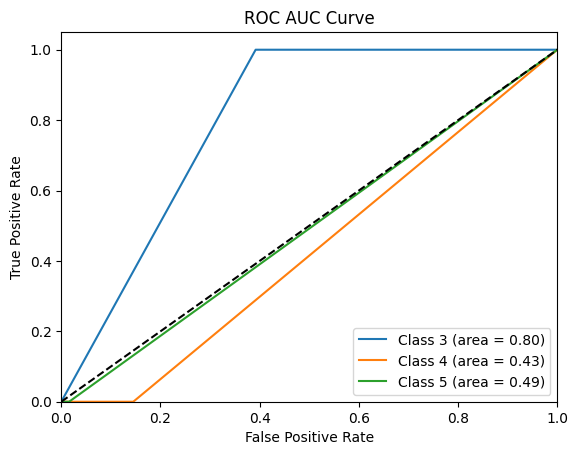


Naive Bayes Classifier:

Accuracy: 0.55

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 1  1  7  1  0  0]
 [ 0  1 85 41  3  0]
 [ 0  4 36 69 21  2]
 [ 0  0  2 19 21  0]
 [ 0  0  0  1  4  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320



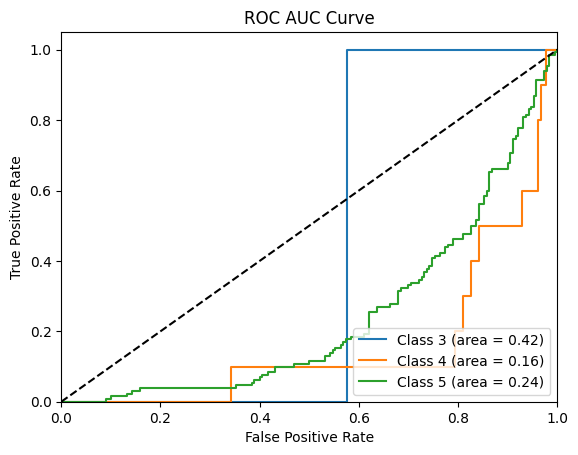


SVM Classifier:

Accuracy: 0.5625

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 51 81  0  0]
 [ 0  0  3 39  0  0]
 [ 0  0  0  5  0  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.76      0.68       130
           6       0.52      0.61      0.56       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.46      0.56      0.51       320



/home/beyza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/beyza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/beyza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


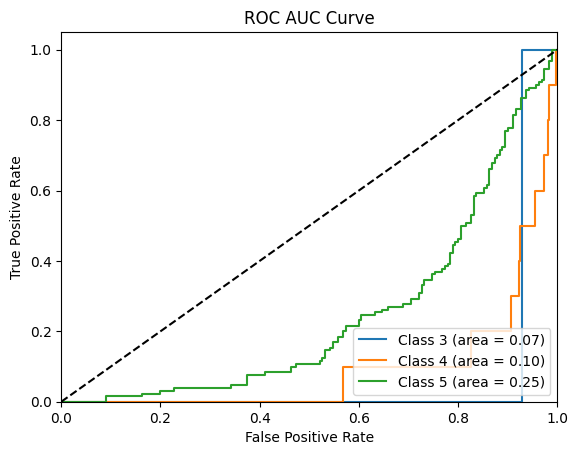

In [ ]:
# Helper function to plot ROC AUC curve for multi-class classification
def plot_multiclass_roc(model, X_test, y_test, n_classes):
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, 'decision_function'):
        y_score = model.decision_function(X_test)
    else:
        raise AttributeError("Model does not have 'predict_proba' or 'decision_function' method.")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Check if both classes are present
        if len(np.unique(y_test == i)) == 2:
            fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
            roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])
        else:
            print(f"Warning: Class {i} has only one class present in y_test. Skipping ROC AUC calculation.")

    for i in range(n_classes):
        # Check if ROC curve was calculated for this class
        if i in fpr:
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Decision Tree
y_pred_dt = final_dt.predict(X_test)
y_prob_dt = final_dt.predict_proba(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("\nDecision Tree Classifier:")
print(f"\nAccuracy: {accuracy_dt}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

plt.figure()
plot_multiclass_roc(final_dt, X_test, y_test, n_classes=len(set(y_test)))

# Evaluate Naive Bayes
y_pred_nb = final_nb.predict(X_test)
y_prob_nb = final_nb.predict_proba(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaive Bayes Classifier:")
print(f"\nAccuracy: {accuracy_nb}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

plt.figure()
plot_multiclass_roc(final_nb, X_test, y_test, n_classes=len(set(y_test)))

# Evaluate SVM
y_pred_svm = final_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("\nSVM Classifier:")
print(f"\nAccuracy: {accuracy_svm}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

plt.figure()
plot_multiclass_roc(final_svm, X_test, y_test, n_classes=len(set(y_test)))

In [ ]:
# Check the distribution of y_test
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{3: 1, 4: 10, 5: 130, 6: 132, 7: 42, 8: 5}


## 3. Provide a detailed account of your observations.

Observations:

    SVM shows slightly better accuracy than Naive Bayes but is still below the Decision Tree.

    Performance for lower classes (3 and 4) is poor.

    Class 5 shows good precision and recall.

    All classifiers struggle with lower classes due to class imbalance.

    Class 5 consistently shows the best performance across all models.

    Due to the class imbalance, some classes in y_test have only one instance or none, leading to issues in calculating ROC AUC for those classes.

# Task 5: Improve Model Performance using Bagging, Boosting, and Stacking

## 1. Use ensemble methods to enhance the model performance by combining the strengths of multiple models.

In [ ]:
# Bagging with Decision Tree
bagging = BaggingClassifier(final_dt, n_estimators=50, random_state=42)

# Boosting with AdaBoost
adaboost = AdaBoostClassifier(final_dt, n_estimators=50, algorithm='SAMME', random_state=42)

# Stacking with Decision Tree, Naive Bayes, and SVM
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('svm', SVC(probability=True))
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())



In [ ]:
# Train the Bagging model
bagging.fit(X_train, y_train)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Train the Stacking model
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('nb', GaussianNB()),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

## 2. Plotting ROC AUC Curves for Ensemble Methods
Note: You can find explanation of ensemble method in Appendix 1

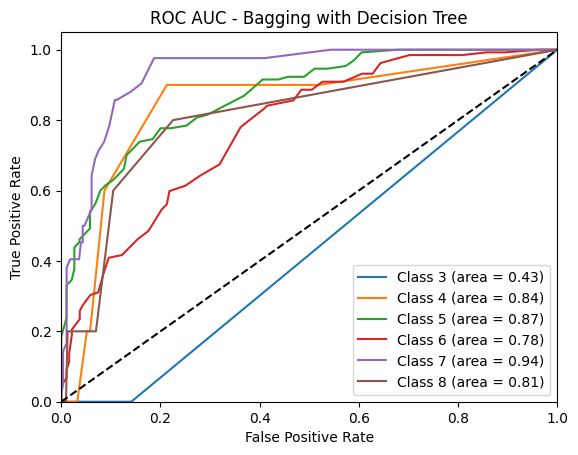

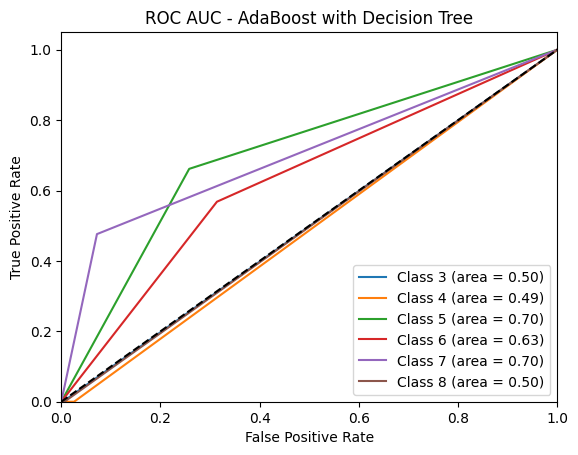

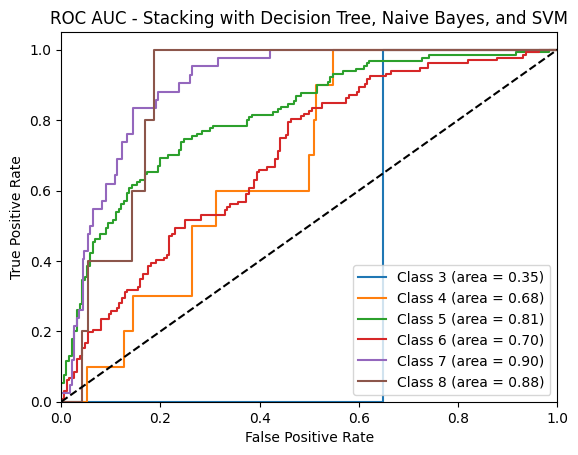

In [ ]:
# Function to plot ROC AUC
def plot_roc_auc(model, X_test, y_test, y_bin, model_name):
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[3, 4, 5, 6, 7, 8])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+3} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC AUC for Bagging
plot_roc_auc(bagging, X_test, y_test, y_bin, 'Bagging with Decision Tree')

# Plot ROC AUC for AdaBoost
plot_roc_auc(adaboost, X_test, y_test, y_bin, 'AdaBoost with Decision Tree')

# Plot ROC AUC for Stacking
plot_roc_auc(stacking, X_test, y_test, y_bin, 'Stacking with Decision Tree, Naive Bayes, and SVM')


# Task 6: Final Evaluation and Summary


## 1. Summarize the results and compare the performance of different models and techniques.
• Compare Model Performances by plotting the accuracy histogram of all models


Accuracy: 0.59375

Accuracy: 0.55

Accuracy: 0.5625

Accuracy: 0.659375

Accuracy: 0.565625

Accuracy: 0.6


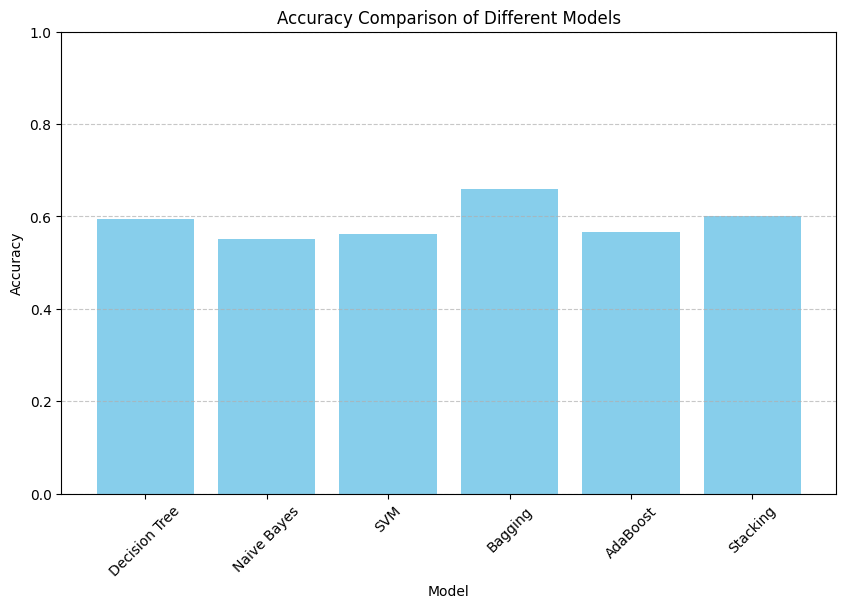

In [ ]:
# List of models to compare
models = {
    'Decision Tree': final_dt,
    'Naive Bayes': final_nb,
    'SVM': final_svm,
    'Bagging': bagging,
    'AdaBoost': adaboost,
    'Stacking': stacking
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Calculate accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"\nAccuracy: {accuracy}")
    accuracy_scores[name] = accuracy  # Store accuracy

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Provide a detailed account of your observations.

Bagging with Decision Tree: It has the highest accuracy. Effective in reducing variance and improving model stability. But perform bad at the Class 3.

Boosting with AdaBoost: Accurayy level is lower than other ensemble methods.

Stacking with Decision Tree, Naive Bayes, and SVM: Combined the strengths of different algorithms, leading to a robust model that performed well across various metrics.

Ensemble methods generally outperform individual models due to their ability to combine strengths and mitigate weaknesses.

Bagging was particularly effective, likely due to its focus on combine the predictions from all models.
